In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import auc, roc_auc_score, roc_curve
%matplotlib inline

In [3]:
df = pd.read_csv('./BankChurners.csv')
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


# Data cleaning

In [37]:
df.drop(df.columns[-2:], axis = 1, inplace = True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# See if any rows of columns have blank data

In [38]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [39]:
df.drop('CLIENTNUM', axis = 1, inplace = True)
target_col = pd.get_dummies(df['Attrition_Flag'], drop_first = True)

df['target'] = target_col

df.drop('Attrition_Flag', axis = 1, inplace = True)
df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'target'],
      dtype='object')

# Qualitative variable encoding

In [40]:
print(df.dtypes)

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
target                        uint8
dtype: object


In [41]:
df.head(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1
5,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1
6,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,1
7,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,1
8,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,1
9,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,1


In [42]:
df['Gender'].unique()
d = {
    'M': 0,
    'F': 1
}
df['Gender'] = df['Gender'].map(d)


In [43]:
d = {
    'Unknown': 0,
    'Single': 1,
    'Married': 2,
    'Divorced': 3
}
df['Marital_Status'] = df['Marital_Status'].map(d)

In [44]:
df['Education_Level'].value_counts().index
d = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}
df['Education_Level'] = df['Education_Level'].map(d)

In [45]:
d = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}
df['Income_Category'] = df['Income_Category'].map(d)

In [46]:
df['Card_Category'].value_counts().index
d = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}
df['Card_Category'] = df['Card_Category'].map(d)

In [47]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,0,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,1,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,0,3,4,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,1,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,0,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


# Descriptive statistics of variables

In [48]:
df.describe()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,0.529081,2.346203,2.601955,1.536585,2.085711,0.083638,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,8.016814,0.499178,1.298908,1.700417,0.737808,1.474639,0.333784,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,46.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,52.000000,1.000000,3.000000,4.000000,2.000000,3.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


# Correlation coefficients of variables

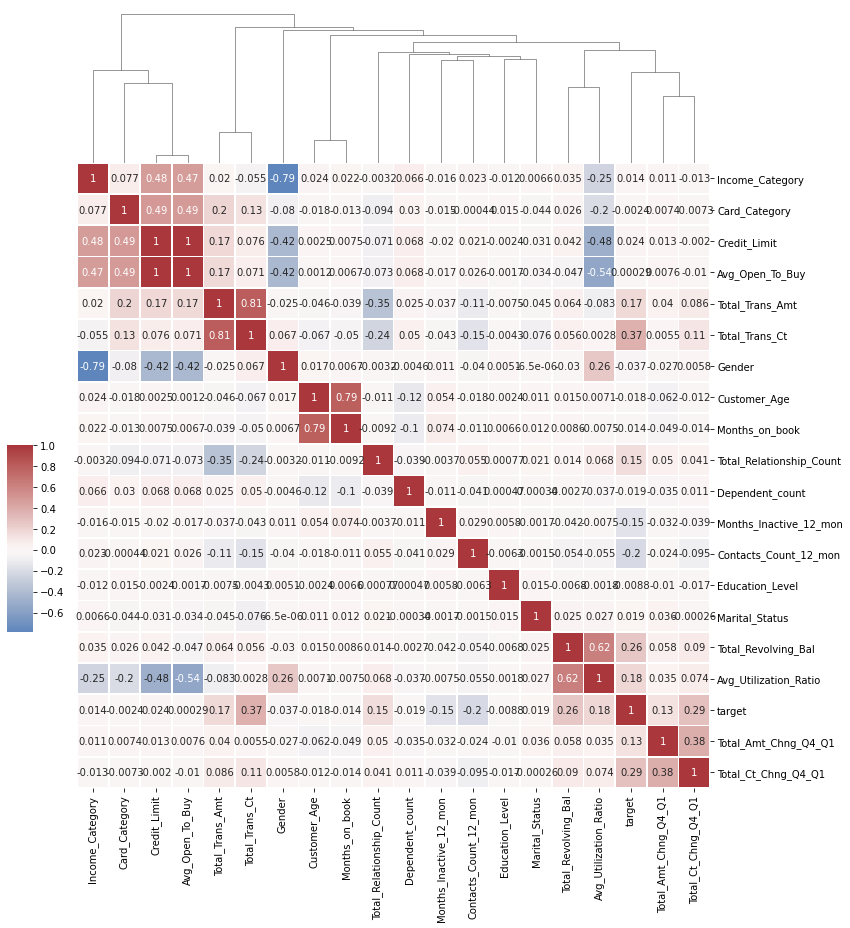

In [49]:
corrMatrix = df
g = sns.clustermap(corrMatrix.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13), annot=True)
g.ax_row_dendrogram.remove()

In [50]:
df.drop('Credit_Limit', axis = 1, inplace = True)
df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'target'],
      dtype='object')

In [51]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,0,3,2,2,3,0,39,5,1,3,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,1,5,4,1,1,0,44,6,1,2,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,0,3,4,2,4,0,36,4,1,0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,1,4,2,0,1,0,34,3,4,1,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,0,3,1,2,3,0,21,5,1,0,0,4716.0,2.175,816,28,2.500,0.000,1


# Logit model

In [52]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,1.0,45,0,3,2,2,3,0,39,5,1,3,777,11914.0,1.335,1144,42,1.625,0.061,1
1,1.0,49,1,5,4,1,1,0,44,6,1,2,864,7392.0,1.541,1291,33,3.714,0.105,1
2,1.0,51,0,3,4,2,4,0,36,4,1,0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,1.0,40,1,4,2,0,1,0,34,3,4,1,2517,796.0,1.405,1171,20,2.333,0.760,1
4,1.0,40,0,3,1,2,3,0,21,5,1,0,0,4716.0,2.175,816,28,2.500,0.000,1


In [53]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_constant.columns[:-1]
model=sm.Logit(df.target,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10108
Method:                           MLE   Df Model:                           18
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        17:02:52   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.9465      0.392    -12.604      0.000      -5.716      -4.177
Customer_Age                 0.0063      0.008      0.822      0.411      -0.009       0.021
Gender                      -0.9688      0.127     -7.643      0.000      -1.217      -0.720
Dependent_count             -0.1306      0.030     -4.402      0.000      -0.189      -0.072
Education_Level             -0.0059      0.022     -0.267      0.789      -0.049       0.037
Marital_Status               0.2464      0.052      4.730      0.000       0.144       0.349
Income_Category             -0.1524      0.044     -3.452      0.001      -0.239      -0.066
Card_Category               -0.3929      0.126     -3.128      0.002      -0.639      -0.147
Months_on_book               0.0055      0.008      0.721      0.471      -0.009       0.020
Total_Relationship_Count     0.4499      0.027     16.455      0.000       0.396       0.503
Months_Inactive_12_mon      -0.5078      0.038    -13.474      0.000      -0.582      -0.434
Contacts_Count_12_mon       -0.5105      0.036    -14.041      0.000      -0.582      -0.439
Total_Revolving_Bal          0.0010   6.93e-05     13.780      0.000       0.001       0.001
Avg_Open_To_Buy           1.208e-05   6.29e-06      1.921      0.055   -2.48e-07    2.44e-05
Total_Amt_Chng_Q4_Q1         0.4171      0.185      2.248      0.025       0.053       0.781
Total_Trans_Amt             -0.0005   2.26e-05    -20.893      0.000      -0.001      -0.000
Total_Trans_Ct               0.1159      0.004     31.717      0.000       0.109       0.123
Total_Ct_Chng_Q4_Q1          2.8231      0.188     15.046      0.000       2.455       3.191
Avg_Utilization_Ratio        0.1064      0.243      0.437      0.662      -0.371       0.583
============================================================================================
"""

# Select the appropriate variable for the model

In [54]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)
result=back_feature_elem(df_constant,df.target,cols)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [55]:
result.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10112
Method:                           MLE   Df Model:                           14
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        17:02:58   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.9537      0.386    -12.819      0.000      -5.711      -4.196
Customer_Age                 0.0109      0.005      2.322      0.020       0.002       0.020
Gender                      -0.9807      0.127     -7.752      0.000      -1.229      -0.733
Dependent_count             -0.1286      0.030     -4.350      0.000      -0.187      -0.071
Marital_Status               0.2435      0.052      4.684      0.000       0.142       0.345
Income_Category             -0.1264      0.042     -3.005      0.003      -0.209      -0.044
Card_Category               -0.2680      0.108     -2.471      0.013      -0.481      -0.055
Total_Relationship_Count     0.4501      0.027     16.470      0.000       0.397       0.504
Months_Inactive_12_mon      -0.5055      0.037    -13.484      0.000      -0.579      -0.432
Contacts_Count_12_mon       -0.5094      0.036    -14.036      0.000      -0.581      -0.438
Total_Revolving_Bal          0.0010   4.61e-05     21.011      0.000       0.001       0.001
Total_Amt_Chng_Q4_Q1         0.4248      0.186      2.288      0.022       0.061       0.789
Total_Trans_Amt             -0.0005   2.25e-05    -20.949      0.000      -0.001      -0.000
Total_Trans_Ct               0.1160      0.004     31.761      0.000       0.109       0.123
Total_Ct_Chng_Q4_Q1          2.8233      0.188     15.047      0.000       2.456       3.191
============================================================================================
"""

In [56]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print((conf))

                          CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                         0.003309       0.015051    0.007057   0.000
Customer_Age                  1.001697       1.020242    1.010927   0.020
Gender                        0.292674       0.480578    0.375037   0.000
Dependent_count               0.829787       0.931772    0.879302   0.000
Marital_Status                1.152151       1.412593    1.275743   0.000
Income_Category               0.811497       0.957004    0.881252   0.003
Card_Category                 0.618380       0.946100    0.764885   0.013
Total_Relationship_Count      1.486699       1.654811    1.568505   0.000
Months_Inactive_12_mon        0.560468       0.649189    0.603199   0.000
Contacts_Count_12_mon         0.559596       0.645150    0.600852   0.000
Total_Revolving_Bal           1.000878       1.001059    1.000969   0.000
Total_Amt_Chng_Q4_Q1          1.062871       2.200281    1.529253   0.022
Total_Trans_Amt               0.999484

# Evaluate model

In [57]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]

y= df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 18), (2026, 18), (8101,), (2026,))

In [58]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [59]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator =classifier,X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(),
accuracies.std()*2))

Logistic Regression Classifier Accuracy: 0.90 (+/- 0.01)


In [60]:
from sklearn.metrics import confusion_matrix
y_pred =classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 182,  127],
       [  63, 1654]], dtype=int64)

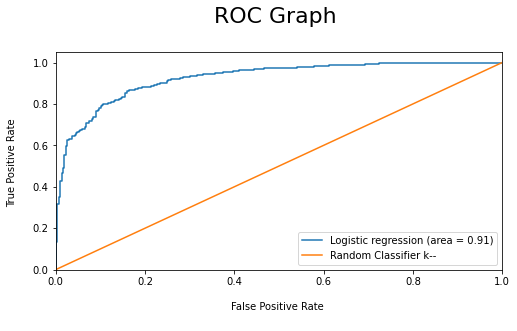

In [61]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 4))
plt.plot(rf_fpr, rf_tpr, 
label='Logistic regression (area = %0.2f)' % classifier_roc_auc)
plt.plot([0,1], [0,1],label='Random Classifier ' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Probability that each customer in the test dataset wants to continue using the credit card service

In [62]:
y_pred = classifier.predict(X_test)
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
final_results = pd.concat([y_test] , axis = 1).dropna()
final_results['predictions'] = y_pred
final_results['prob'] = y_pred_probs
final_results['prob'] = final_results['prob']*100
final_results['prob']=final_results['prob'].round(2)
final_results = final_results[['predictions', 'prob']]
final_results ['Ranking'] = pd.qcut(final_results['prob'].rank(method = 'first'),10,labels=range(10,0,-1))
print(final_results.sort_values(by='prob', ascending=False))

      predictions   prob Ranking
6150            1  99.99       1
3730            1  99.99       1
190             1  99.99       1
7027            1  99.99       1
2227            1  99.98       1
...           ...    ...     ...
406             0   1.23      10
343             0   1.08      10
8379            0   1.05      10
8574            0   0.87      10
7207            0   0.20      10

[2026 rows x 3 columns]


(array([  64.,   54.,   39.,   54.,   35.,   63.,   70.,   96.,  184.,
        1367.]),
 array([ 0.2  , 10.179, 20.158, 30.137, 40.116, 50.095, 60.074, 70.053,
        80.032, 90.011, 99.99 ]),
 <a list of 10 Patch objects>)

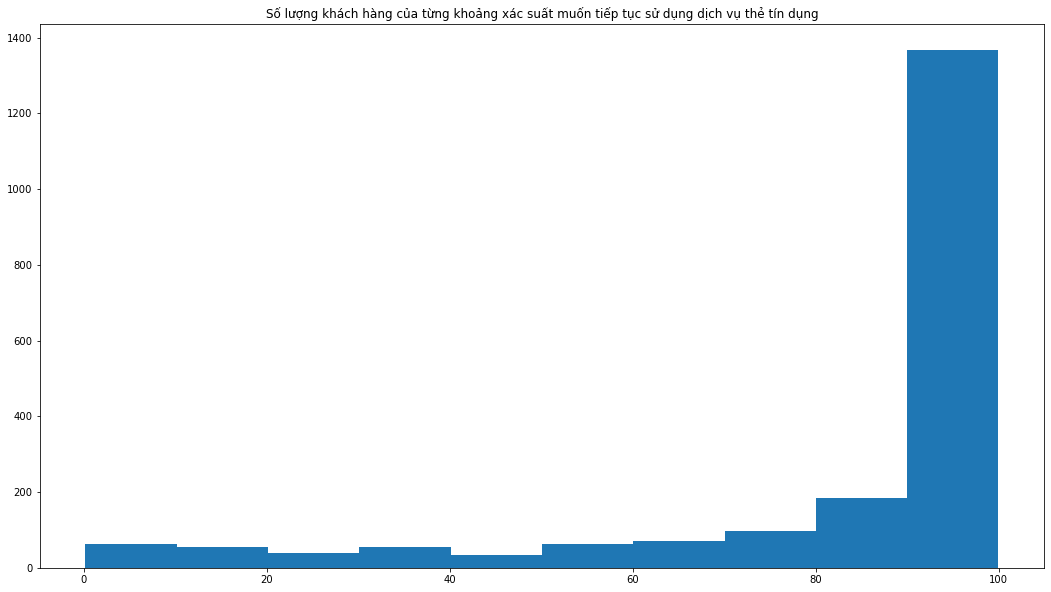

In [63]:
fig = plt.figure(figsize=(18,10))
plt.title('Số lượng khách hàng của từng khoảng xác suất muốn tiếp tục sử dụng dịch vụ thẻ tín dụng')
plt.hist(x=final_results['prob'], bins=10)

In [29]:
final_results.to_excel('./Xác suất muốn tiếp tục sử dụng dịch vụ thẻ tín dụng.xlsx', sheet_name='Sheet1', index = False)